<a href="https://colab.research.google.com/github/Israt1063/7.Speech-Emotion-Recognition-with-librosa/blob/main/7_Speech_Emotion_Recognition_with_librosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ STEP 1: Install Required Libraries
!pip install librosa soundfile scikit-learn numpy --quiet

In [ ]:
# ✅ STEP 2: Download Dataset (using Free Spoken Digit Dataset as demo)
!mkdir -p data
!wget -q https://github.com/Jakobovski/free-spoken-digit-dataset/archive/refs/heads/master.zip -O data/emotion_dataset.zip
!unzip -q data/emotion_dataset.zip -d data/


In [ ]:
# ✅ STEP 3: Import Libraries
import os
import librosa
import soundfile as sf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# ✅ STEP 4: Feature Extraction Function
def extract_features(file_path):
    with sf.SoundFile(file_path) as sound_file:
        audio = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        result = np.array([])

        # MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        result = np.hstack((result, np.mean(mfccs.T, axis=0)))

        # Chroma
        chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
        result = np.hstack((result, np.mean(chroma.T, axis=0)))

        # Mel Spectrogram
        mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
        result = np.hstack((result, np.mean(mel.T, axis=0)))

    return result


In [ ]:
# ✅ STEP 5: Load Dataset and Simulate Emotions
def load_data(directory):
    features, labels = [], []
    for file in os.listdir(directory):
        if file.endswith(".wav"):
            file_path = os.path.join(directory, file)
            feature = extract_features(file_path)
            digit = int(file[0])  # file: 0_jackson_1.wav -> digit = 0

            # Simulated emotions based on digit
            if digit <= 2:
                emotion = "neutral"
            elif digit <= 5:
                emotion = "happy"
            else:
                emotion = "angry"

            features.append(feature)
            labels.append(emotion)
    return np.array(features), np.array(labels)

data_dir = "data/free-spoken-digit-dataset-master/recordings"
X, y = load_data(data_dir)



In [ ]:
# ✅ STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ✅ STEP 7: Train the MLP Model
model = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500, activation='relu', solver='adam')
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500)

In [ ]:
# ✅ STEP 8: Evaluate Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("🎯 Model Accuracy: {:.2f}%".format(accuracy * 100))


🎯 Model Accuracy: 96.83%


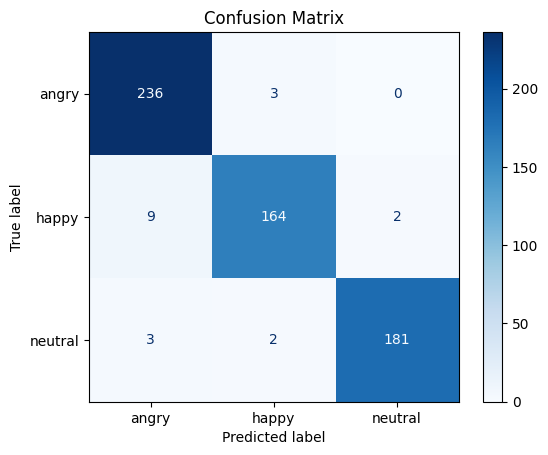

In [ ]:
# ✅ STEP 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()